In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


**Load Dataset**

In [3]:
df = pd.read_csv("/content/heart.csv")  # Replace with your dataset's path


**Explore data**

In [4]:
print(df.head())
print(df.info())
print(df.describe())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

**Data preprocessing**

In [53]:
# Check for missing values again to confirm
print(X_train.isnull().sum())
print(X_test.isnull().sum())



sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
target               0
age_group            0
age_group_encoded    0
dtype: int64
sex                  0
cp                   0
trestbps             0
chol                 0
fbs                  0
restecg              0
thalach              0
exang                0
oldpeak              0
slope                0
ca                   0
thal                 0
target               0
age_group            0
age_group_encoded    0
dtype: int64


In [54]:
# Fill missing values with the most frequent value for categorical features and the mean for numerical features
for col in X_train.columns:
    if X_train[col].dtype.name == 'category':
        X_train[col].fillna(X_train[col].mode()[0], inplace=True)  # Use mode for categorical
        X_test[col].fillna(X_test[col].mode()[0], inplace=True)    # Use mode for categorical
    else:
        X_train[col].fillna(X_train[col].mean(), inplace=True)   # Use mean for numerical
        X_test[col].fillna(X_test[col].mean(), inplace=True)     # Use mean for numerical

<ipython-input-54-a9ed435b28ef>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train[col].fillna(X_train[col].mean(), inplace=True)   # Use mean for numerical
<ipython-input-54-a9ed435b28ef>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [55]:
# Drop rows with missing values
X_train.dropna(inplace=True)
X_test.dropna(inplace=True)


In [56]:
#normalization
scaler = StandardScaler()
# Apply scaling only to numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [57]:
#encode categorial feature
# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


**EDA**

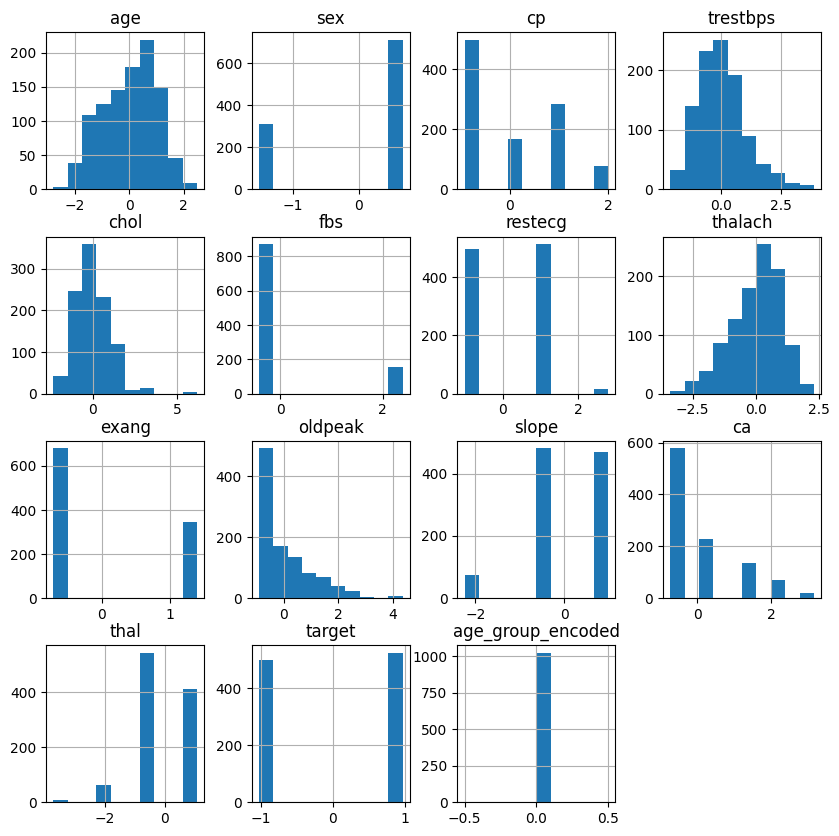

In [58]:
df.hist(figsize=(10, 10))
plt.show()


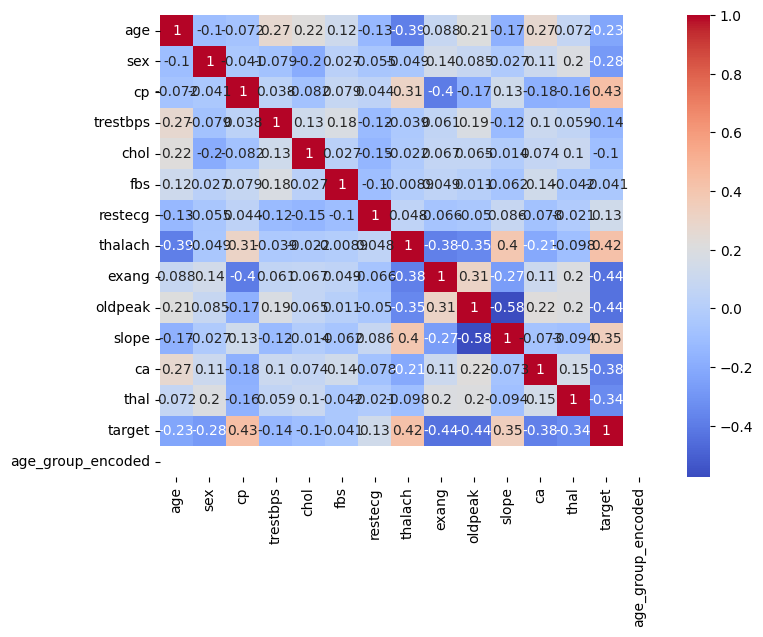

In [62]:
#Correlation
plt.figure(figsize=(8, 6))
# Calculate correlation only for numeric features
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

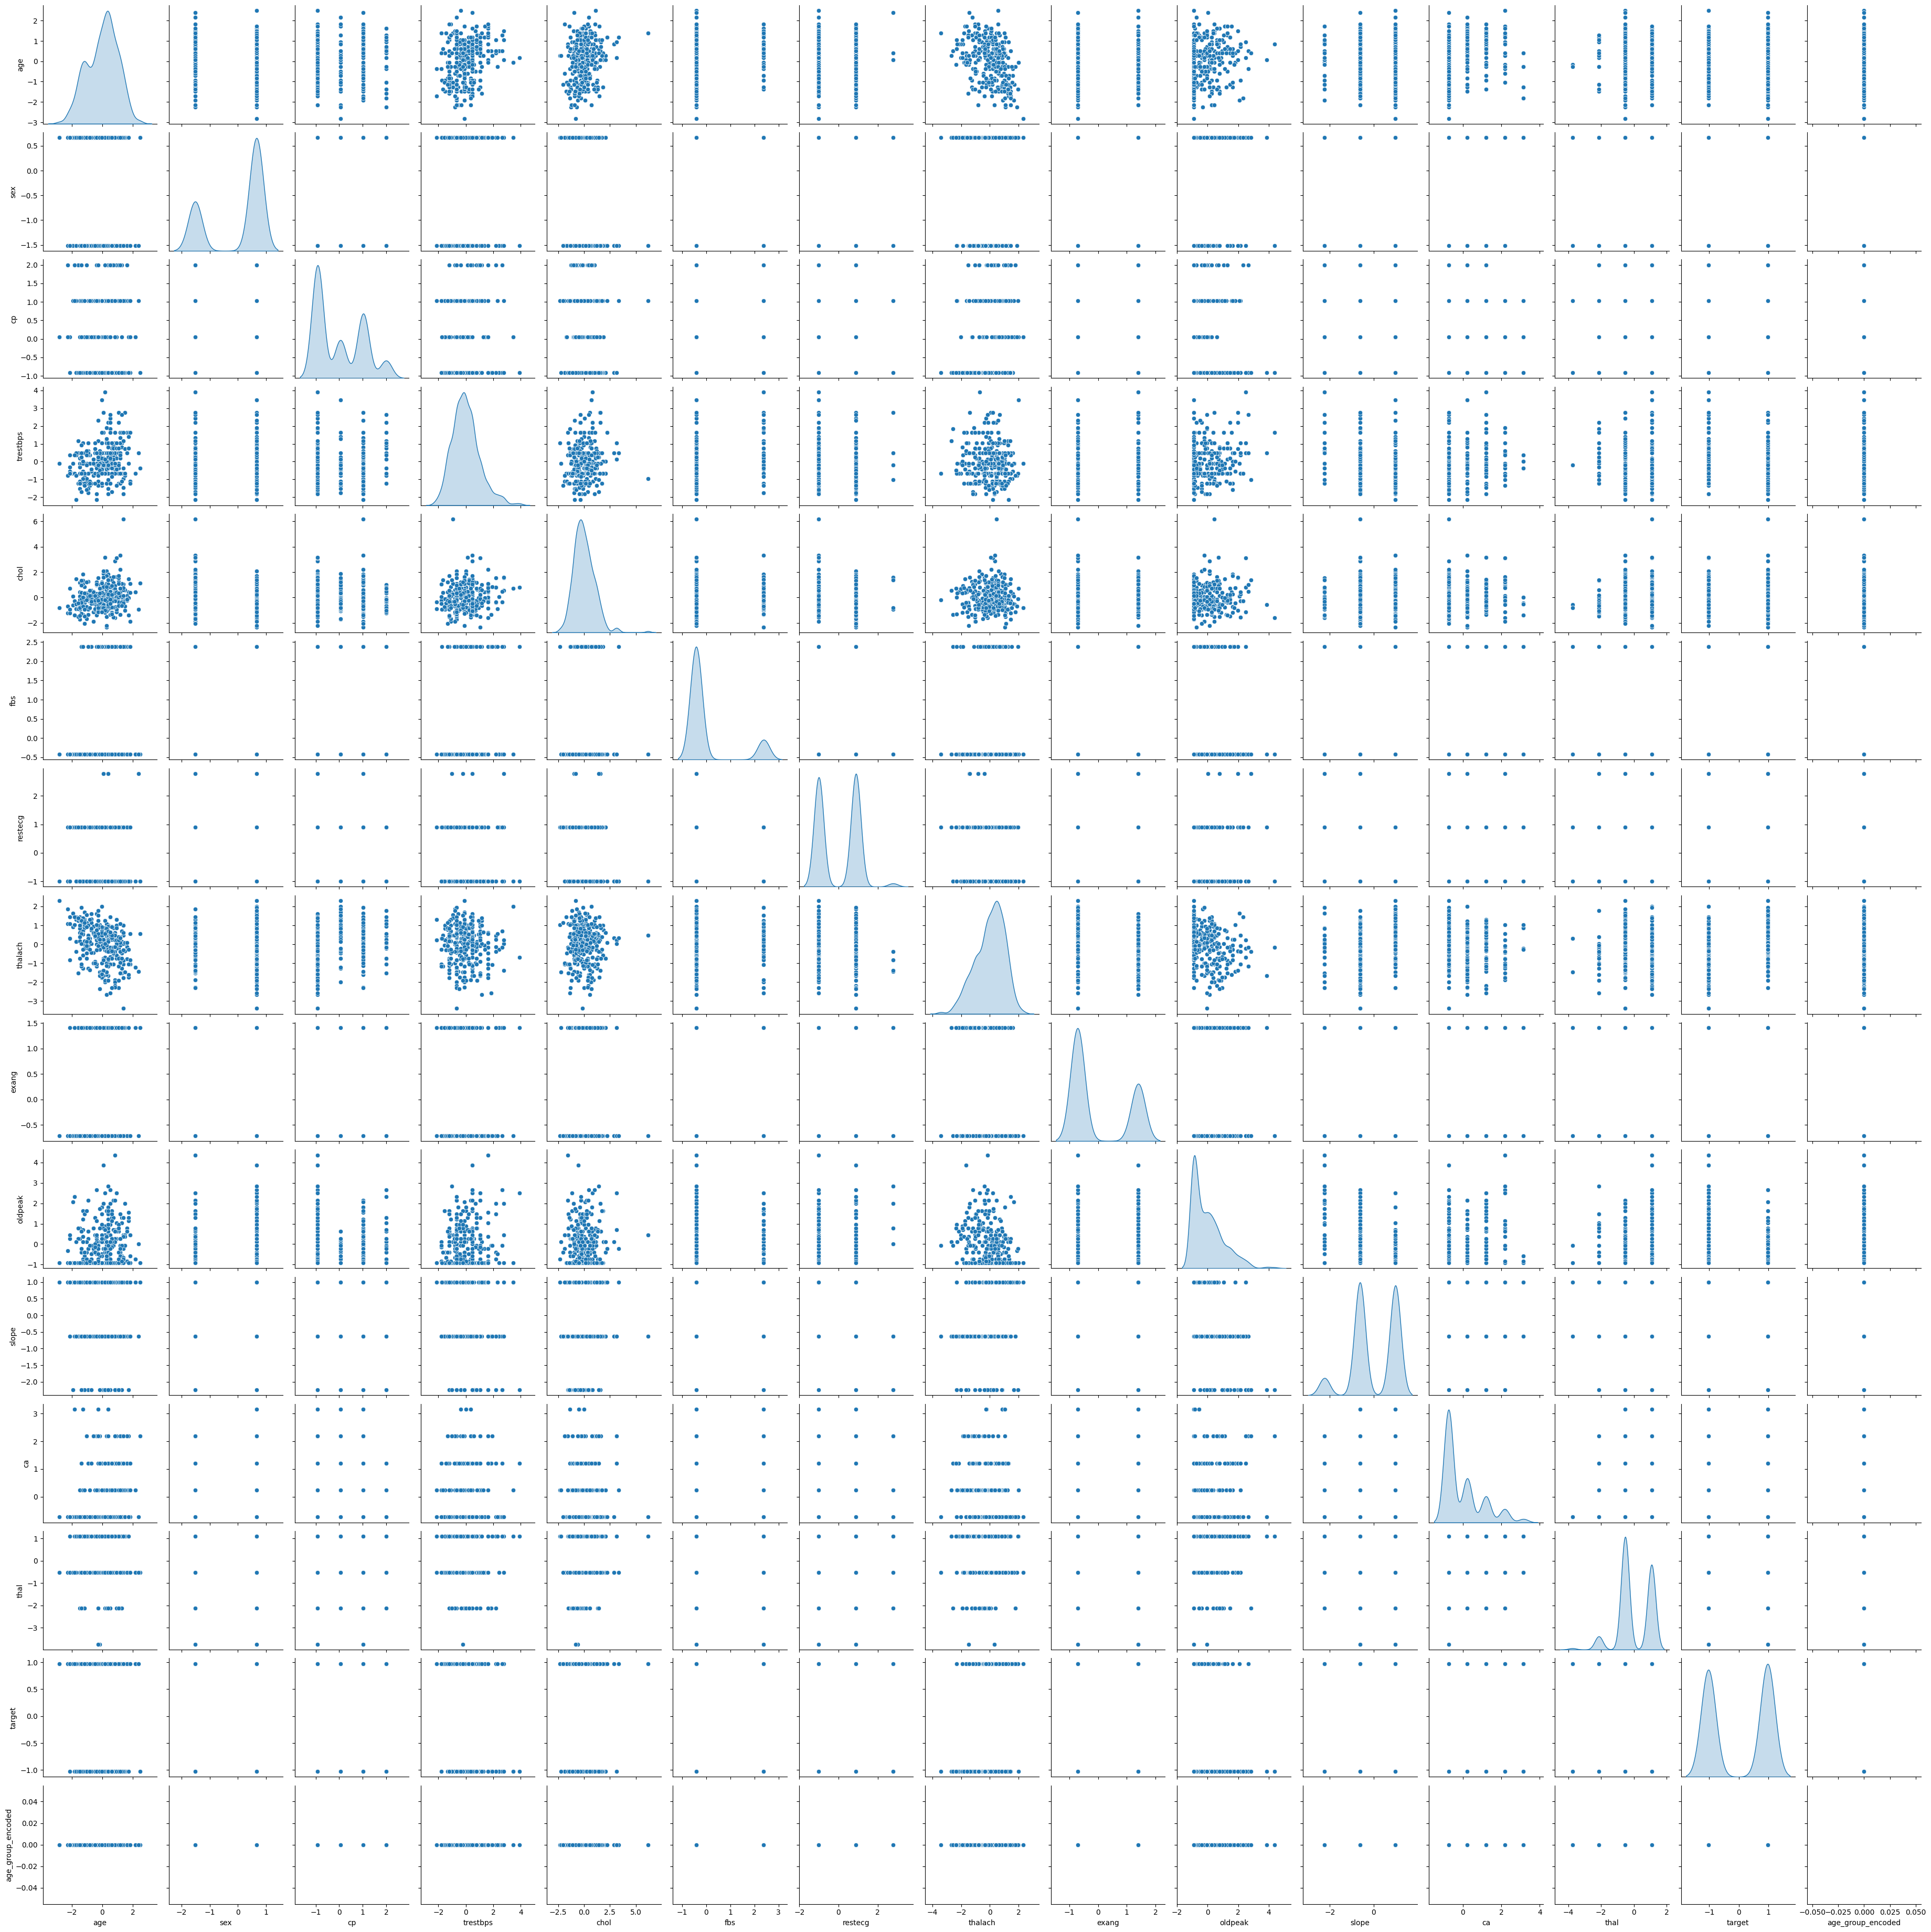

In [63]:
#scatterplot for relationship
sns.pairplot(df, diag_kind='kde')
plt.show()


In [65]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Feature Selection
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Encode categorical variables (if any)
# If there are categorical variables, encode them using LabelEncoder
# Example: Encoding the 'age_group' column that might be categorical (if present)
if 'age_group' in X.columns:
    le = LabelEncoder()
    X['age_group_encoded'] = le.fit_transform(X['age_group'])
    X = X.drop('age_group', axis=1)  # Drop original categorical column

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the numeric columns only
# Identify the numeric columns
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Apply scaling only to numeric columns
scaler = StandardScaler()
X_train_scaled = X_train.copy()  # Make a copy of the original data for scaling
X_test_scaled = X_test.copy()    # Make a copy of the original data for scaling

# Apply StandardScaler to numeric columns
X_train_scaled[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test_scaled[numeric_columns] = scaler.transform(X_test[numeric_columns])

# Verify the scaling step
print(X_train_scaled.head())


          age       sex        cp  trestbps      chol       fbs   restecg  \
835 -0.585840  0.654654  1.008275 -0.779454 -1.935031 -0.414039 -0.983742   
137  1.051477 -1.527525 -0.916720  2.741732  1.610634 -0.414039  0.909846   
534 -0.040068 -1.527525  1.008275 -1.347387  0.442176 -0.414039 -0.983742   
495  0.505705  0.654654 -0.916720  0.186033 -0.222636 -0.414039  0.909846   
244 -0.367531  0.654654  1.008275 -0.381900 -0.001032  2.415229 -0.983742   

      thalach     exang   oldpeak     slope        ca      thal  \
835 -1.019094 -0.725949 -0.210661  1.005264  2.171691 -0.545193   
137  0.202882  1.377507 -0.912152  1.005264 -0.725467 -0.545193   
534  0.770228 -0.725949 -0.912152  1.005264 -0.725467 -0.545193   
495  0.508376 -0.725949 -0.473720 -0.640079 -0.725467  1.110579   
244  0.726586 -0.725949  1.192321 -0.640079 -0.725467 -0.545193   

     age_group_encoded  
835           1.060355  
137          -0.943081  
534           1.060355  
495          -0.943081  
244      

**Train model**

In [75]:
print(y.unique())


[-0.26843658 -0.15815703  1.71659547  0.72407944  0.834359    0.39324077
  0.06240209 -0.93011394 -0.04787747  1.82687503 -1.26095261 -2.25346864
 -0.37871614 -0.4889957   0.61379988  1.38575679 -1.04039349  0.94463856
 -1.37123217 -1.15067305  0.17268165  0.28296121  0.50352033  1.05491812
  1.16519768 -1.48151173  1.27547724 -1.8123504  -0.59927526 -0.70955482
 -2.80486643 -1.92262996 -0.81983438  1.49603635  2.37827282 -1.59179129
 -1.70207085  2.48855238  1.60631591 -2.14318908  2.1577137 ]


In [76]:
# Binning the target into categories
y_binned = pd.cut(y, bins=3, labels=[0, 1, 2])  # 3 bins for classification

# Use y_binned as the target variable for classification


In [79]:
# Assuming 'target' is the actual target column name in your dataset
X = df.drop('age', axis=1)  # Replace 'target_column' with the actual target column name - 'target' in this case
y = df['age']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Logistic regression

In [107]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming df is your DataFrame
X = df.drop('target', axis=1)  # Features
y = df['target']  # Target variable

# Replace '<30' and ensure all values are numeric
X = X.applymap(lambda x: 29 if x == '<30' else x)

# Handle missing values in X
imputer = SimpleImputer(strategy='mean')  # Replace NaNs with column mean
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Encode non-numeric columns (if any)
non_numeric_cols = X.select_dtypes(include=['object']).columns
if not non_numeric_cols.empty:
    for col in non_numeric_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

# Convert target to binary if needed
y = pd.cut(y, bins=2, labels=[0, 1])  # Adjust bins if necessary

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_log_reg = log_reg_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1 = f1_score(y_test, y_pred_log_reg)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Print results
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Logistic Regression Model Evaluation:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109
Confusion Matrix:
[[73 29]
 [13 90]]


<ipython-input-107-87243d5ef67e>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = X.applymap(lambda x: 29 if x == '<30' else x)


Random Forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Initialize the Random Forest Regressor model
rf_reg_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the scaled training data
rf_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf_reg = rf_reg_model.predict(X_test_scaled)

# Evaluate the model performance
mae = mean_absolute_error(y_test, y_pred_rf_reg)
mse = mean_squared_error(y_test, y_pred_rf_reg)
r2 = r2_score(y_test, y_pred_rf_reg)

# Print the evaluation metrics
print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

#print accuracy
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)



Random Forest Model Evaluation:
Mean Absolute Error: 0.0628780487804878
Mean Squared Error: 0.017103902439024387
R-squared: 0.931582762231106
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109
Confusion Matrix:
[[73 29]
 [13 90]]


**SVM**

In [114]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the SVM regressor model
svm_reg_model = SVR()

# Train the SVM regressor model
svm_reg_model.fit(X_train_scaled, y_train)

# Make predictions with the SVM model
y_pred_svm = svm_reg_model.predict(X_test_scaled)

# Evaluate the SVM model
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# Print the evaluation metrics for SVM
print("SVM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svm}")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R-squared (R²): {r2_svm}")

#print accuracy
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


SVM Model Evaluation:
Mean Absolute Error (MAE): 0.15120455909319575
Mean Squared Error (MSE): 0.04933833850655002
R-squared (R²): 0.8026419497679644
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109
Confusion Matrix:
[[73 29]
 [13 90]]


In [108]:
#print evalations ofeach model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

print("Random Forest Model Evaluation:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

print("SVM Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_svm}")
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R-squared (R²): {r2_svm}")


Logistic Regression Model Evaluation:
Accuracy: 0.7951219512195122
Precision: 0.7563025210084033
Recall: 0.8737864077669902
F1-Score: 0.8108108108108109
Confusion Matrix:
[[73 29]
 [13 90]]
Random Forest Model Evaluation:
Mean Absolute Error: 0.0011350725296245775
Mean Squared Error: 4.200788064663278e-05
R-squared: 0.9999541411220285
SVM Model Evaluation:
Mean Absolute Error (MAE): 0.08049167191859001
Mean Squared Error (MSE): 0.00749360443394474
R-squared (R²): 0.9918194327823078


**Comparison model**

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train Logistic Regression model
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train_scaled, y_train)
y_pred_log = log_reg_model.predict(X_test_scaled)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Model evaluation metrics
model_metrics = {
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_svm),
    ],
    "Precision": [
        precision_score(y_test, y_pred_log, average='binary'),
        precision_score(y_test, y_pred_rf, average='binary'),
        precision_score(y_test, y_pred_svm, average='binary'),
    ],
    "Recall": [
        recall_score(y_test, y_pred_log, average='binary'),
        recall_score(y_test, y_pred_rf, average='binary'),
        recall_score(y_test, y_pred_svm, average='binary'),
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_log, average='binary'),
        f1_score(y_test, y_pred_rf, average='binary'),
        f1_score(y_test, y_pred_svm, average='binary'),
    ],
}

# Create a DataFrame to summarize the evaluation metrics
import pandas as pd
summary_df = pd.DataFrame(model_metrics)

# Display the summary of the evaluation metrics
print(summary_df)



                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.795122   0.756303  0.873786  0.810811
1        Random Forest  0.985366   1.000000  0.970874  0.985222
2                  SVM  0.814634   0.760000  0.922330  0.833333


**Visualization**

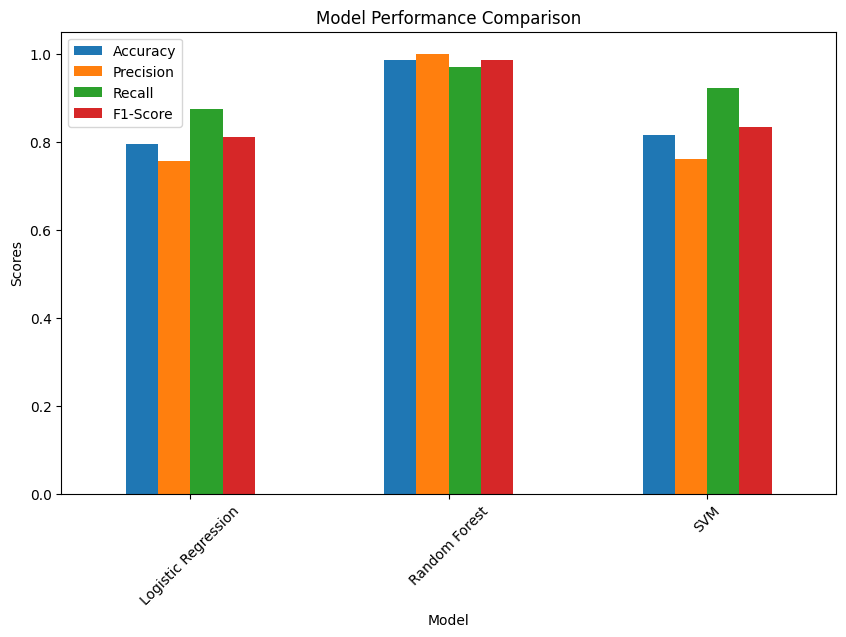

In [120]:
summary_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Scores")
plt.xticks(rotation=45)
plt.show()
